# Projeto III - Computação Centífica II
### Solução do Problema Planar de Bratu
> Autor: Gil Miranda<br>
> Contato: gil.neto@ufrj.br<br>
> Repo: [@mirandagil](https://github.com/mirandagil)<br>

## Dependências e bibliotecas externas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

---
## Da solução Analítica

Vamos aqui programar as funções que retornam a solução analítica do problema

In [2]:
def analytical_bratu(x, l):
    b_1 = 0
    b_2 = 16
    if l >= 1.5:
        b_2 = 8
    elif l > 1:
        b_2 = 10
    z = optimize.fixed_point(solve_z, [b_1, b_2], args=(l,0))
    if z[0] != z[1]:
        tu_1 = np.cosh((x-1/2)*z[0]/2)/np.cosh(z[0]/4)
        bra_1 = -2*np.log(tu_1)
        tu_2 = np.cosh((x-1/2)*z[1]/2)/np.cosh(z[1]/4)
        bra_2 = -2*np.log(tu_2)
        bratu = [bra_1, bra_2]
    else:
        tu = np.cosh((x-1/2)*z[0]/2)/np.cosh(z[0]/4)
        bra = -2*np.log(tu)
        bratu = bra
    return bratu

def solve_z(z, l, l1 = 0):
    return np.sqrt(2*l)*np.cosh(z/4)

def lambda_c(l):
    a = optimize.fixed_point(alpha, 5)
    return 8*(a**2 -1)

def alpha(x):
    return 1/np.tanh(x)


### Plotando a solução
Vamos fazer um plot da solução para $\lambda = 2.5$

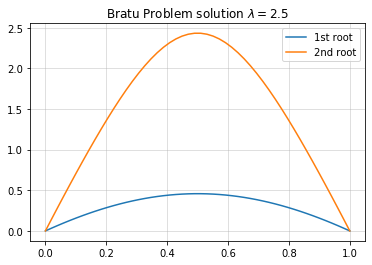

In [3]:
ls = np.linspace(0, lambda_c(0))
xs = np.linspace(0,1)
sol = [analytical_bratu(xs, l) for l in ls]
phi = analytical_bratu(xs, 2.5)
ys_0 = []
ys_1 = []

## plotting time
plt.plot(xs, phi[0], label = "1st root")
plt.plot(xs, phi[1], label = "2nd root")
plt.grid(alpha = 0.5)
plt.legend()
plt.title('Bratu Problem solution $\lambda = 2.5$')
plt.show()

### Visualizando a correlação de bifurcação das soluções para $\lambda < \lambda_c$

Como visto no artigo, temos raíz dupla $z_1, z_2$ para $\lambda < \lambda_c$ e raíz única para $\lambda = \lambda_c$, então plotando o maior valor de cada solução em função de cada $\lambda$ temos o seguinte gráfico

In [4]:
for y in sol:
    if type(y) is list:
            ys_0.append(max(y[0]))
            ys_1.append(max(y[1]))
    else:
        ys_0.append(max(y))
        ys_1.append(max(y))

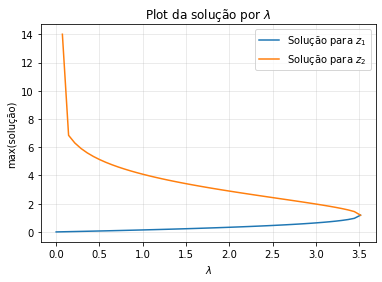

In [5]:
plt.plot(ls, ys_0, label = 'Solução para $z_1$')
plt.plot(ls[1:], ys_1[1:], label = 'Solução para $z_2$')
plt.title('Plot da solução por $\lambda$')
plt.xlabel('$\lambda$')
plt.ylabel('max(solução)')
plt.grid(alpha = 0.3)
plt.legend()
plt.show()

In [6]:
ls

array([0.        , 0.07171083, 0.14342166, 0.21513249, 0.28684332,
       0.35855416, 0.43026499, 0.50197582, 0.57368665, 0.64539748,
       0.71710831, 0.78881914, 0.86052997, 0.9322408 , 1.00395163,
       1.07566247, 1.1473733 , 1.21908413, 1.29079496, 1.36250579,
       1.43421662, 1.50592745, 1.57763828, 1.64934911, 1.72105994,
       1.79277078, 1.86448161, 1.93619244, 2.00790327, 2.0796141 ,
       2.15132493, 2.22303576, 2.29474659, 2.36645742, 2.43816825,
       2.50987909, 2.58158992, 2.65330075, 2.72501158, 2.79672241,
       2.86843324, 2.94014407, 3.0118549 , 3.08356573, 3.15527656,
       3.2269874 , 3.29869823, 3.37040906, 3.44211989, 3.51383072])

Agora temos como comparar a solução analítica com a númerica e verificar o erro do metódo.

---
## Da solução Númerica #1

In [7]:
t0 = 0
tf = 1
n = 20
h = 1/(n+1)
ts = [t0]
us = np.random.rand(21)
u0 = 0
uf = 0
l = 2.5
for i in range(n+1):
    ts.append(ts[-1] + h)
    
def F(u):
    F = []
    for j in range(n+1):
        if j == 0:
            fi = u0
        elif j == n:
            fi = uf
        else:
            fi = (u[j+1] - 2*u[j] + u[j-1])/h**2 + l * np.e**(u[j])
        F.append(fi)
    return F

In [8]:
### Preparando o grid de x
N = 5
h = 1/N
xs = np.arange(0,1+h,h)

eps_array = [10,1,0.1,0.01]

eps = eps_array[2]

def bvp_solve(n):
    h = 1/(n+1)
    u0 = ui = 0
    u1 = 1

    phiH = 2*np.log(np.cosh(h))
    A = 1/phiH
    B = -2/phiH
    C = 1/phiH
    
    M_A = A*np.eye(n,k = 1)
    M_B = B*np.eye(n)
    M_C = C*np.eye(n, k = -1)
    
    M = M_A + M_B + M_C
   # M = np.array([
   #     [B, A, 0, 0],
   #     [C, B, A, 0],
   #     [0, C, B, A],
   #     [0, 0, C, B]
   # ])

    b = np.zeros(n)
    u = np.linalg.solve(M,b)
    hs = [0]
    while hs[-1] <= 1:
        hs.append(hs[-1] + h)
    u = np.insert(u,0,0)
    u = np.append(u,1)
    return u, hs

In [9]:
bvp_solve(5)

(array([ 0., -0., -0., -0., -0., -0.,  1.]),
 [0,
  0.16666666666666666,
  0.3333333333333333,
  0.5,
  0.6666666666666666,
  0.8333333333333333,
  0.9999999999999999,
  1.1666666666666665])